In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fraud-email-dataset/fraud_email_.csv


In [29]:
raw_data=pd.read_csv('/kaggle/input/fraud-email-dataset/fraud_email_.csv')
raw_data.head(2)

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0


In [30]:
raw_data=raw_data[0:4000]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    4000 non-null   object
 1   Class   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [31]:
raw_data.dropna(inplace=True)

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    4000 non-null   object
 1   Class   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.8+ KB


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
text_array=vectorizer.fit_transform(raw_data['Text']).toarray()
text_array[0:2]

array([[0.        , 0.03039527, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
data=pd.DataFrame(text_array)

In [35]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54391,54392,54393,54394,54395,54396,54397,54398,54399,54400
0,0.0,0.030395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
data['Class']=raw_data['Class']
del raw_data

In [37]:
print(data.head(5))
print(data.info())

     0         1    2    3    4    5    6    7    8    9  ...  54392  54393  \
0  0.0  0.030395  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   54394  54395  54396  54397  54398  54399  54400  Class  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0      1  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0      1  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0      1  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  

[5 rows x 54402 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 54402 entries, 0 to Class
dtypes: float64(54401), int64(

In [38]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [39]:
Y=data.pop('Class')
X=data
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=True)
del X
del Y

Iteration 1, loss = 0.60947311
Iteration 2, loss = 0.25876215
Iteration 3, loss = 0.04010933
Iteration 4, loss = 0.00800937
Iteration 5, loss = 0.00369935
Iteration 6, loss = 0.00245874
Iteration 7, loss = 0.00202389
Iteration 8, loss = 0.00181533
Iteration 9, loss = 0.00168461
Iteration 10, loss = 0.00160209
Iteration 11, loss = 0.00155760
Iteration 12, loss = 0.00150415
Iteration 13, loss = 0.00146705
Iteration 14, loss = 0.00147986
Iteration 15, loss = 0.00139829
Iteration 16, loss = 0.00140925
Iteration 17, loss = 0.00140890
Iteration 18, loss = 0.00140772
Iteration 19, loss = 0.00148424
Iteration 20, loss = 0.00134082
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


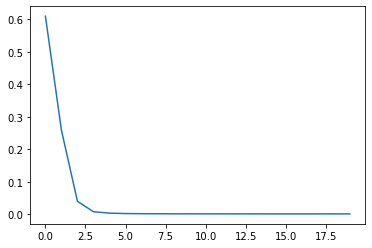

In [40]:
model=MLPClassifier(verbose=True,hidden_layer_sizes=(120,120,120,),max_iter=2000)
model.fit(x_train,y_train)


plt.plot(model.loss_curve_)
plt.show()

In [41]:
y_pre_test=model.predict(x_test)
y_pre_train=model.predict(x_train)
print("TEST DATA\n")
print("Accuracy:\n",accuracy_score(y_pre_test,y_test))
print("Report:\n",classification_report(y_pre_test,y_test))
print("Confusion:\n",confusion_matrix(y_pre_test,y_test))
print("\n\nTRAINING DATA\n")
print("Accuracy:\n",accuracy_score(y_pre_train,y_train))
print("Report:\n",classification_report(y_pre_train,y_train))
print("Confusion:\n",confusion_matrix(y_pre_train,y_train))

TEST DATA

Accuracy:
 0.991
Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       592
           1       0.99      0.99      0.99       408

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion:
 [[586   6]
 [  3 405]]


TRAINING DATA

Accuracy:
 0.9996666666666667
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1320

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion:
 [[1679    1]
 [   0 1320]]
